In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

C:\Users\MOHIT TARADE\New folder\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


File Location

In [2]:
import os
os.getcwd()

'C:\\Users\\MOHIT TARADE'

In [3]:
cc = pd.read_csv(r"creditcard.csv")
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


EDA

In [4]:
cc.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
cc.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Finding ouliers by boxplot


<Axes: >

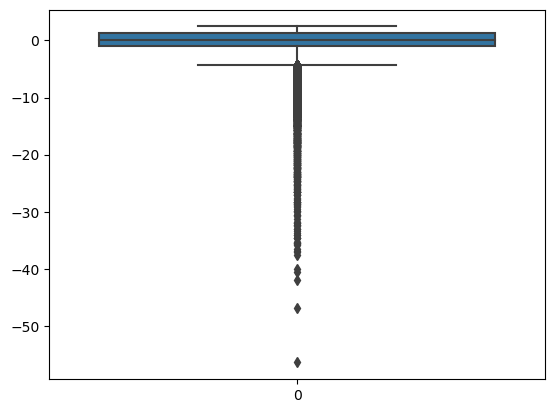

In [7]:
sns.boxplot(cc["V1"])

In [8]:
Q1 = cc.quantile(0.25)
Q3 = cc.quantile(0.75)
IQR = Q3 - Q1
lower_tail = Q1 - 1.5 * IQR
upper_tail = Q3 + 1.5 * IQR
ouliers = (cc < lower_tail) | (cc > upper_tail)
ouliers_count = ouliers.sum()
print(ouliers_count)

Time          0
V1         7062
V2        13526
V3         3363
V4        11148
V5        12295
V6        22965
V7         8948
V8        24134
V9         8283
V10        9496
V11         780
V12       15348
V13        3368
V14       14149
V15        2894
V16        8184
V17        7420
V18        7533
V19       10205
V20       27770
V21       14497
V22        1317
V23       18541
V24        4774
V25        5367
V26        5596
V27       39163
V28       30342
Amount    31904
Class       492
dtype: int64


<Axes: xlabel='Class', ylabel='count'>

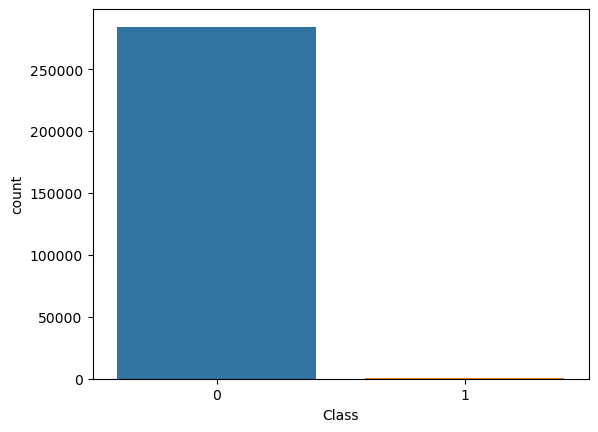

In [9]:
sns.countplot(x= cc["Class"])

In [10]:
not_fraud=cc[cc.Class==0]
fraud=cc[cc.Class==1]
print(not_fraud.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


Build a sample dataset containing similar amount of not_fraud and fraud data

In [11]:
not_fraud_sample=not_fraud.sample(n=492)

In [12]:
df=pd.concat([not_fraud_sample,fraud],axis=0)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
102836,68387.0,1.445049,-1.117112,0.582290,-1.511023,-1.533435,-0.407259,-1.170462,-0.006436,-1.957769,...,-0.328578,-0.679158,0.110970,-0.057974,0.132949,-0.408504,0.034315,0.019320,32.40,0
25536,33657.0,1.257233,-1.576966,0.071302,-1.308119,-1.135139,0.393276,-0.967200,0.018005,-1.395054,...,-0.404226,-0.885365,-0.103816,-0.943567,0.344655,-0.254358,0.036700,0.032874,147.62,0
199597,133045.0,0.146215,0.752398,-0.526622,1.003573,1.462247,-0.166709,0.646847,-0.455071,-0.252690,...,-0.256666,-0.397831,0.091549,-0.004058,-1.485200,0.419281,-0.158519,0.133269,4.49,0
194211,130480.0,-1.253981,1.153767,1.089858,-1.144886,0.454754,-0.351341,0.443076,0.556978,-0.987118,...,-0.395292,-1.415124,-0.023862,0.727286,0.162869,0.103238,0.074453,0.020207,2.48,0
106373,69944.0,-0.981002,1.187617,1.019315,-0.065889,-0.136026,-0.396425,0.276831,0.491375,-0.297684,...,-0.227075,-0.541192,0.102879,0.132195,-0.277930,0.055632,0.073835,-0.147079,10.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [13]:
df["Class"].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

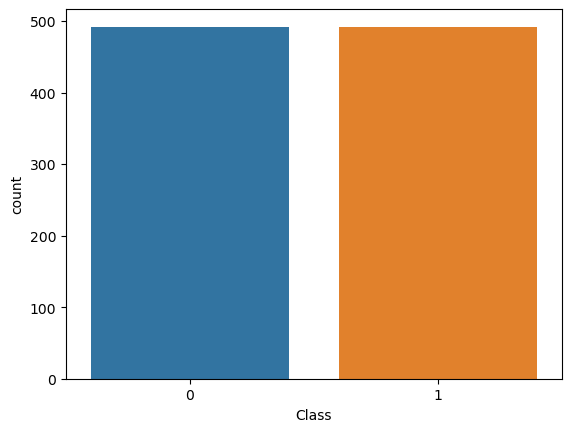

In [14]:
sns.countplot(x= df["Class"])

Feature Selection

In [15]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.250450,-0.210638,0.146612,-0.225185,0.278795,0.117804,0.215593,-0.141028,0.177294,...,-0.062412,0.135351,0.074715,-0.002012,-0.206332,-0.042800,-0.132350,-0.005236,-0.007680,-0.137473
V1,0.250450,1.000000,-0.776923,0.875750,-0.621991,0.854362,0.322089,0.884907,-0.078205,0.670331,...,0.014888,-0.035371,-0.033045,-0.073696,-0.083990,0.067602,0.191008,0.188919,-0.039385,-0.430929
V2,-0.210638,-0.776923,1.000000,-0.845367,0.672039,-0.792098,-0.269442,-0.833850,-0.021422,-0.708258,...,0.028982,-0.007242,0.179583,-0.027147,0.146002,-0.020453,-0.141347,0.004113,-0.263640,0.497311
V3,0.146612,0.875750,-0.845367,1.000000,-0.774033,0.850358,0.463197,0.885514,-0.165371,0.775723,...,0.027672,-0.053908,-0.029062,0.020898,-0.113219,0.003004,0.092709,0.131154,-0.019973,-0.574723
V4,-0.225185,-0.621991,0.672039,-0.774033,1.000000,-0.577928,-0.434072,-0.714688,0.105809,-0.785156,...,-0.021063,0.100491,0.015231,-0.073931,0.010126,0.129538,0.004951,-0.076748,-0.003185,0.713475
V5,0.278795,0.854362,-0.792098,0.850358,-0.577928,1.000000,0.269028,0.833082,-0.207895,0.662199,...,0.043889,-0.088085,-0.086367,-0.157927,-0.109889,0.065749,0.172412,0.174657,-0.095696,-0.369033
V6,0.117804,0.322089,-0.269442,0.463197,-0.434072,0.269028,1.000000,0.291083,-0.585398,0.390577,...,0.018841,0.020653,0.315092,-0.049584,-0.156469,-0.018836,-0.185462,-0.046008,0.180693,-0.396019
V7,0.215593,0.884907,-0.833850,0.885514,-0.714688,0.833082,0.291083,1.000000,0.090941,0.766891,...,0.046885,-0.120760,-0.101449,-0.051170,0.028479,0.035444,0.219132,0.153794,0.131315,-0.473138
V8,-0.141028,-0.078205,-0.021422,-0.165371,0.105809,-0.207895,-0.585398,0.090941,1.000000,-0.075074,...,-0.097943,0.020405,-0.422908,0.067458,0.235183,0.049145,0.297694,-0.018575,0.020137,0.057004
V9,0.177294,0.670331,-0.708258,0.775723,-0.785156,0.662199,0.390577,0.766891,-0.075074,1.000000,...,0.162596,-0.221492,-0.062518,0.016830,-0.054900,-0.107083,0.102245,0.141890,0.025962,-0.562813


<Axes: >

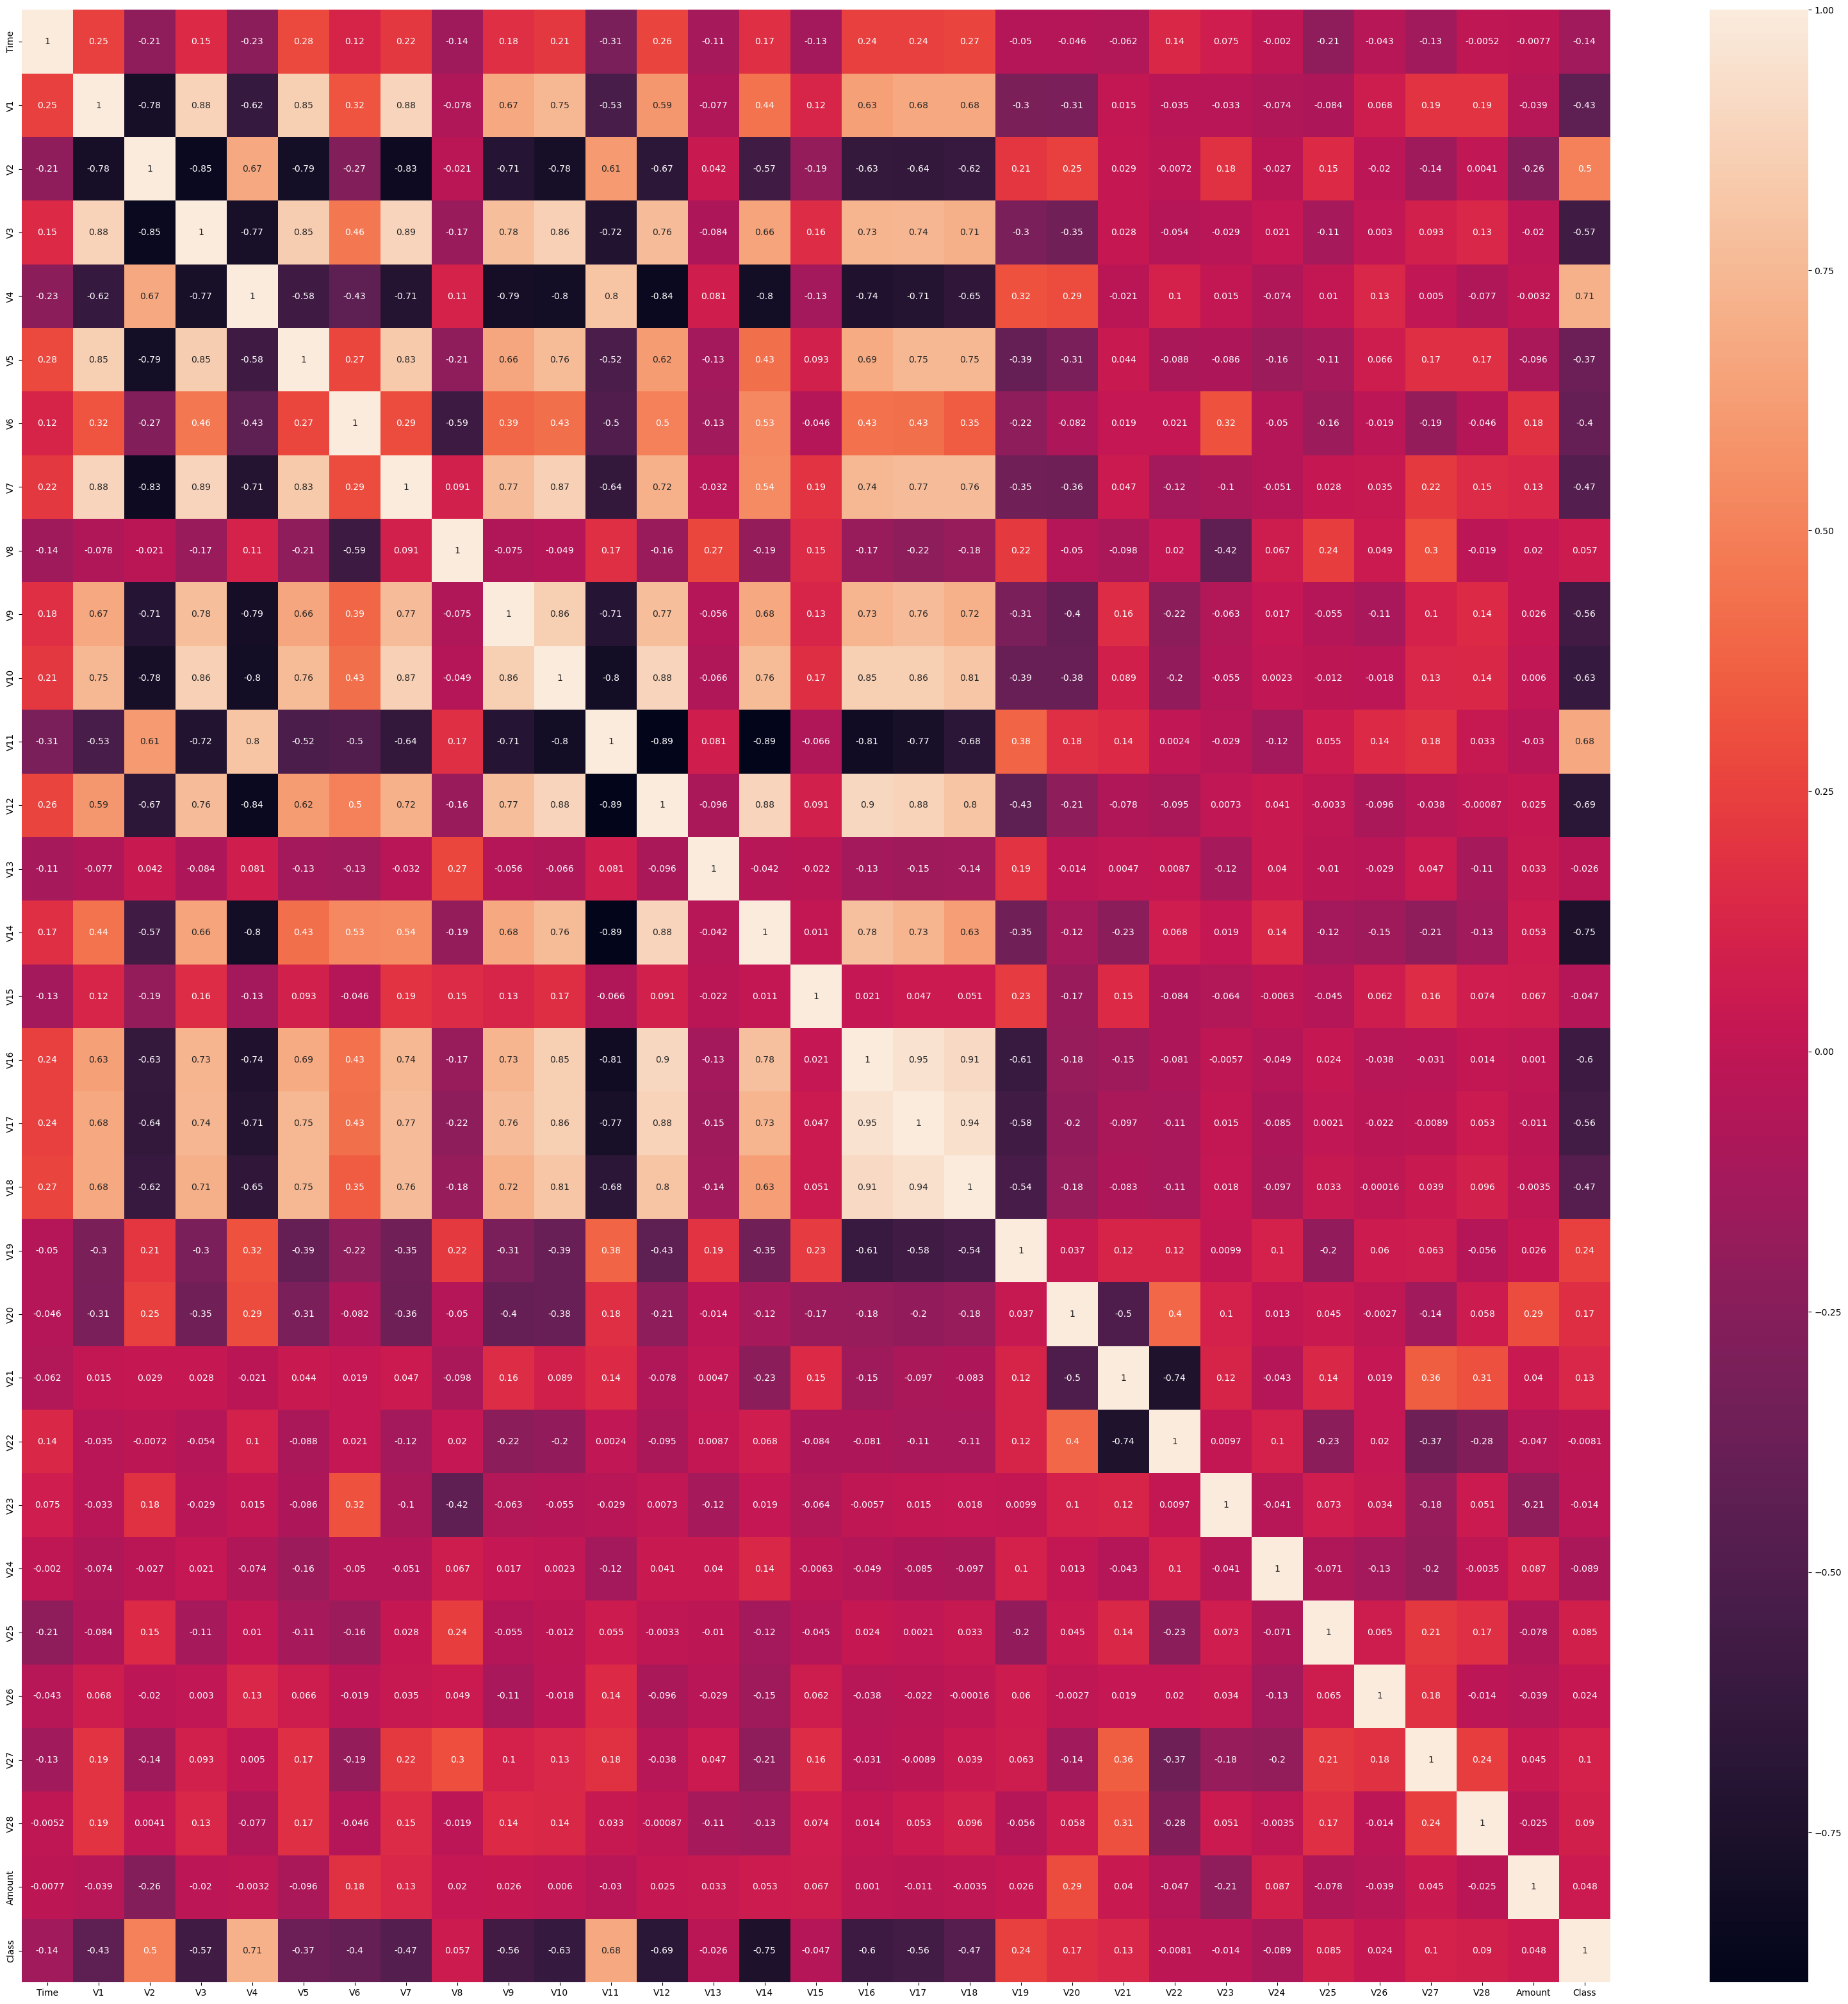

In [16]:
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(),annot= True)

In [17]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std_array = std.fit_transform(df.iloc[:,:30])
std_array

array([[-0.39980997,  0.6999856 , -0.76198224, ..., -0.03350197,
        -0.04311614, -0.27127898],
       [-1.13695426,  0.66582067, -0.88413059, ..., -0.03117091,
        -0.01112373,  0.13812955],
       [ 0.97255615,  0.46371878, -0.26539595, ..., -0.22198141,
         0.225853  , -0.37045093],
       ...,
       [ 1.74315104,  0.31412615, -0.16606104, ...,  0.30936844,
         0.37005619, -0.10964043],
       [ 1.75620441, -0.12930638, -0.30963123, ...,  0.79785074,
        -0.68755946,  0.48414762],
       [ 1.76431236,  0.79947546, -0.42315575, ..., -0.06412237,
        -0.12485452, -0.23528429]])

In [18]:
df1 = pd.DataFrame(std_array)
df1

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.399810,0.699986,-0.761982,0.641916,-1.186059,0.016645,0.185709,0.279009,-0.061189,-0.292403,...,-0.410954,-0.246348,-0.596303,0.114571,-0.005307,0.220241,-0.923887,-0.033502,-0.043116,-0.271279
1,-1.136954,0.665821,-0.884131,0.560282,-1.122385,0.111599,0.655880,0.313769,-0.056183,-0.048298,...,-0.230622,-0.273450,-0.771265,-0.068612,-1.572276,0.534203,-0.606410,-0.031171,-0.011124,0.138130
2,0.972556,0.463719,-0.265396,0.464760,-0.396943,0.730812,0.326989,0.589787,-0.153075,0.447257,...,0.096971,-0.220584,-0.357603,0.098007,0.090092,-2.179486,0.781011,-0.221981,0.225853,-0.370451
3,0.918114,0.209013,-0.158783,0.723003,-1.071160,0.490627,0.218551,0.554940,0.054206,0.128664,...,-0.078407,-0.270249,-1.220755,-0.000422,1.384132,0.264612,0.130092,0.005729,-0.041023,-0.377593
4,-0.366763,0.258670,-0.149791,0.711734,-0.732555,0.349786,0.192072,0.526511,0.040770,0.427739,...,-0.083665,-0.209983,-0.479241,0.107671,0.331179,-0.389096,0.032042,0.005125,-0.435887,-0.347355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,1.738715,0.086426,-0.166251,-0.172943,-0.162925,0.008766,-0.755904,0.328194,0.082928,-0.338896,...,0.952593,0.150311,-0.290876,0.565267,-0.424497,0.820197,1.541234,0.219028,0.260548,0.999373
980,1.743066,0.687891,-0.122760,-0.250571,-0.268820,0.487725,-0.354201,0.237504,-0.008969,0.067811,...,0.034639,0.004148,0.003905,-0.104283,-0.046136,0.797021,1.440463,0.313322,0.351822,-0.383705
981,1.743151,0.314126,-0.166061,0.195238,-0.564917,0.115079,0.422935,0.097008,0.187986,0.273929,...,0.054154,0.140725,0.687672,0.182778,0.154017,-1.073896,0.887759,0.309368,0.370056,-0.109640
982,1.756204,-0.129306,-0.309631,-0.313752,-0.141649,0.181812,-1.303905,0.101580,0.156972,-0.151230,...,0.106275,0.080339,-0.248469,-0.369071,-0.227694,-0.463598,1.165814,0.797851,-0.687559,0.484148


Separate x & y

In [19]:
x = df1.iloc[:,:30]
y = df["Class"]
print(x.shape)
print(y.shape)

(984, 30)
(984,)


Model Training

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

Logistic Regression Model

In [21]:
logreg=LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)
ytrnpred=logreg.predict(xtrain)
Trnaccuracy = accuracy_score(ytrain,ytrnpred)
Tstaccuracy=accuracy_score(ytest,ypred)

print('Train Acc:',Trnaccuracy)
print('Test Acc:',Tstaccuracy)
print(76*"-")
print('classification Report:',classification_report(ytest,ypred))

Train Acc: 0.9578488372093024
Test Acc: 0.9391891891891891
----------------------------------------------------------------------------
classification Report:               precision    recall  f1-score   support

           0       0.91      0.97      0.94       142
           1       0.97      0.91      0.94       154

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



Decision Tree

In [22]:
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred1=dt.predict(xtest)
ytrnpred1=dt.predict(xtrain)
Trnaccuracy1 = accuracy_score(ytrain,ytrnpred1)
Tstaccuracy1 =accuracy_score(ytest,ypred1)

print('Train Accuracy:',Trnaccuracy1*100)
print('Test Accuracy:',Tstaccuracy1*100)
print(76*"-")
print('classification Report:',classification_report(ytest,ypred1))

Train Accuracy: 100.0
Test Accuracy: 92.22972972972973
----------------------------------------------------------------------------
classification Report:               precision    recall  f1-score   support

           0       0.92      0.92      0.92       142
           1       0.93      0.92      0.93       154

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296



DT Pruning/Hypertuning Using Max Depth

In [23]:
acc_list=[]
depth_list=[]
for i in range(1,30):
    dt1= DecisionTreeClassifier(max_depth=i)
    dt1.fit(xtrain,ytrain)
    ypred2=dt1.predict(xtest)
    ac=accuracy_score(ytest,ypred2)
    
    depth_list.append(i)
    acc_list.append(ac)
    
    print(f"For max_depth={i}, We get Accuracy= {ac*100}")

For max_depth=1, We get Accuracy= 92.56756756756756
For max_depth=2, We get Accuracy= 93.24324324324324
For max_depth=3, We get Accuracy= 92.22972972972973
For max_depth=4, We get Accuracy= 91.8918918918919
For max_depth=5, We get Accuracy= 93.24324324324324
For max_depth=6, We get Accuracy= 92.9054054054054
For max_depth=7, We get Accuracy= 93.24324324324324
For max_depth=8, We get Accuracy= 93.58108108108108
For max_depth=9, We get Accuracy= 92.9054054054054
For max_depth=10, We get Accuracy= 93.58108108108108
For max_depth=11, We get Accuracy= 93.91891891891892
For max_depth=12, We get Accuracy= 92.22972972972973
For max_depth=13, We get Accuracy= 92.9054054054054
For max_depth=14, We get Accuracy= 93.24324324324324
For max_depth=15, We get Accuracy= 93.91891891891892
For max_depth=16, We get Accuracy= 92.22972972972973
For max_depth=17, We get Accuracy= 92.22972972972973
For max_depth=18, We get Accuracy= 93.24324324324324
For max_depth=19, We get Accuracy= 91.21621621621621
For ma

In [24]:
max_acc= acc_list[0]
for i in range(1, len(acc_list)): 
    if (acc_list[i] > max_acc):
        max_acc = acc_list[i]
max_index = acc_list.index(max_acc)
print(f"We observed that, Highest Accuracy of the DT is achieved when its max_depth is : {max_index+1}")

We observed that, Highest Accuracy of the DT is achieved when its max_depth is : 11


In [25]:
dt3= DecisionTreeClassifier(max_depth=6)
dt3.fit(xtrain,ytrain)
ypred3=dt3.predict(xtest)
ytrnpred3=dt3.predict(xtrain)
Trnaccuracy3 = accuracy_score(ytrain,ytrnpred3)
Tstaccuracy3 =accuracy_score(ytest,ypred3)

print('Train Accuracy:',Trnaccuracy3*100)
print('Test Accuracy:',Tstaccuracy3*100)
print(76*"-")
print('classification Report:',classification_report(ytest,ypred3))

Train Accuracy: 97.81976744186046
Test Accuracy: 93.58108108108108
----------------------------------------------------------------------------
classification Report:               precision    recall  f1-score   support

           0       0.90      0.97      0.94       142
           1       0.97      0.90      0.94       154

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



In [26]:
svm=SVC()
svm.fit(xtrain,ytrain)
ypred4=svm.predict(xtest)
ytrnpred4=svm.predict(xtrain)
Trnaccuracy4 = accuracy_score(ytrain,ytrnpred4)
Tstaccuracy4 =accuracy_score(ytest,ypred4)

print('Train Accuracy:',Trnaccuracy4*100)
print('Test Accuracy:',Tstaccuracy4*100)
print(76*"-")
print('classification Report:',classification_report(ytest,ypred4))

Train Accuracy: 95.63953488372093
Test Accuracy: 92.56756756756756
----------------------------------------------------------------------------
classification Report:               precision    recall  f1-score   support

           0       0.88      0.97      0.93       142
           1       0.97      0.88      0.93       154

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296



In [27]:
DF=pd.DataFrame({'Tests':('Logistic Regression', 'Decision Tree', 'SVM'), 'Accuracy':(Tstaccuracy, Tstaccuracy3, Tstaccuracy4)})
DF

,Tests,Accuracy
0,Logistic Regression,0.939189
1,Decision Tree,0.935811
2,SVM,0.925676


From the above we can find the best way to detect fraud in Credit Card usage.